# TASK 1

In [171]:
import numpy as np
import pandas as pd

from IPython.core.pylabtools import figsize
import seaborn as sns

from sklearn import model_selection
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

### преобразовала исходные данные в DataFrame

In [129]:
users = pd.read_csv('users.csv')
game_result = pd.read_csv('game_results.csv')

### объединила два набора данных один, куда попали все зарегистрированные пользователи

In [130]:
df = pd.merge(left=users, right=game_result, left_on='id', right_on='user_id')
df = df.drop(["id_x"], axis =1) # удалила 1 из 2х повторяющихся столбцов,которые образовались из-за объединения

In [131]:
df # получившийся набор данных

,create_time,id_y,user_id,timestamp,winner,length,magic_used,player_cards,round,type
0,2019-11-10 00:57:10,218714,218490,2019-11-10 01:14:52,1,375,7,52,1,1
1,2019-11-10 00:57:10,219061,218490,2019-11-10 01:23:06,1,475,3,41,2,1
2,2019-11-10 00:57:10,219430,218490,2019-11-10 01:31:24,1,476,0,13,3,1
3,2019-11-10 00:57:10,219689,218490,2019-11-10 01:38:43,1,329,2,52,1,1
4,2019-11-10 00:57:10,219943,218490,2019-11-10 01:45:48,1,389,2,20,2,1
...,...,...,...,...,...,...,...,...,...,...
787061,2020-04-09 23:10:04,15802664,234754,2020-04-10 00:09:04,1,199,0,52,2,1
787062,2020-04-09 23:10:04,15802858,234754,2020-04-10 00:12:07,1,151,0,52,3,1
787063,2020-04-09 23:10:04,15984613,234754,2020-04-11 17:24:03,1,264,2,52,1,1
787064,2020-04-09 23:10:04,15984892,234754,2020-04-11 17:26:32,1,129,0,52,2,1


In [132]:
df.ftypes #информация про каждый признак данных 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.ftypes is deprecated and will be removed in a future version. Use DataFrame.dtypes instead.
  """Entry point for launching an IPython kernel.


create_time     object:dense
id_y             int64:dense
user_id          int64:dense
timestamp       object:dense
winner           int64:dense
length           int64:dense
magic_used       int64:dense
player_cards     int64:dense
round            int64:dense
type             int64:dense
dtype: object

### миниВывод = категориальных признаков нет, то есть не нужно их преобразовывать в численные признаки, так как многие модели не умеют с ними работать 
### + нужно преобразовать timestamp и create_time в тип datetime64[ns] для будущего сравнения

In [133]:
df['timestamp']= pd.to_datetime(df['timestamp']) 
df['create_time'] = pd.to_datetime(df['create_time'])

### оставила в наборе данных только операции пользователей за 24 часа после регистрации согласно условию задания

In [134]:
df = df.loc[(df["timestamp"] - df["create_time"]) < "1 days 00:00:00"] 

In [135]:
df.head()

,create_time,id_y,user_id,timestamp,winner,length,magic_used,player_cards,round,type
0,2019-11-10 00:57:10,218714,218490,2019-11-10 01:14:52,1,375,7,52,1,1
1,2019-11-10 00:57:10,219061,218490,2019-11-10 01:23:06,1,475,3,41,2,1
2,2019-11-10 00:57:10,219430,218490,2019-11-10 01:31:24,1,476,0,13,3,1
3,2019-11-10 00:57:10,219689,218490,2019-11-10 01:38:43,1,329,2,52,1,1
4,2019-11-10 00:57:10,219943,218490,2019-11-10 01:45:48,1,389,2,20,2,1


### проверка на пропущенные значения = таковые отсутствуют

In [136]:
df.isnull().sum()

create_time     0
id_y            0
user_id         0
timestamp       0
winner          0
length          0
magic_used      0
player_cards    0
round           0
type            0
dtype: int64

### построение тепловой карты, для проверки зависимости признаков друг от друга = избыточных признаков не обнаружино, оставляем все в наборе данных

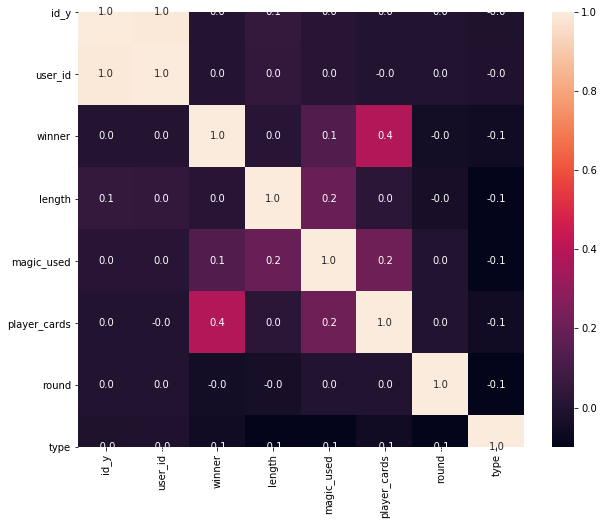

In [10]:
figsize(10,8)
svm = sns.heatmap(df.corr(),annot = True, fmt ='.1f')
figure = svm.get_figure()
figure.savefig('svm_conf.png', dpi=200)

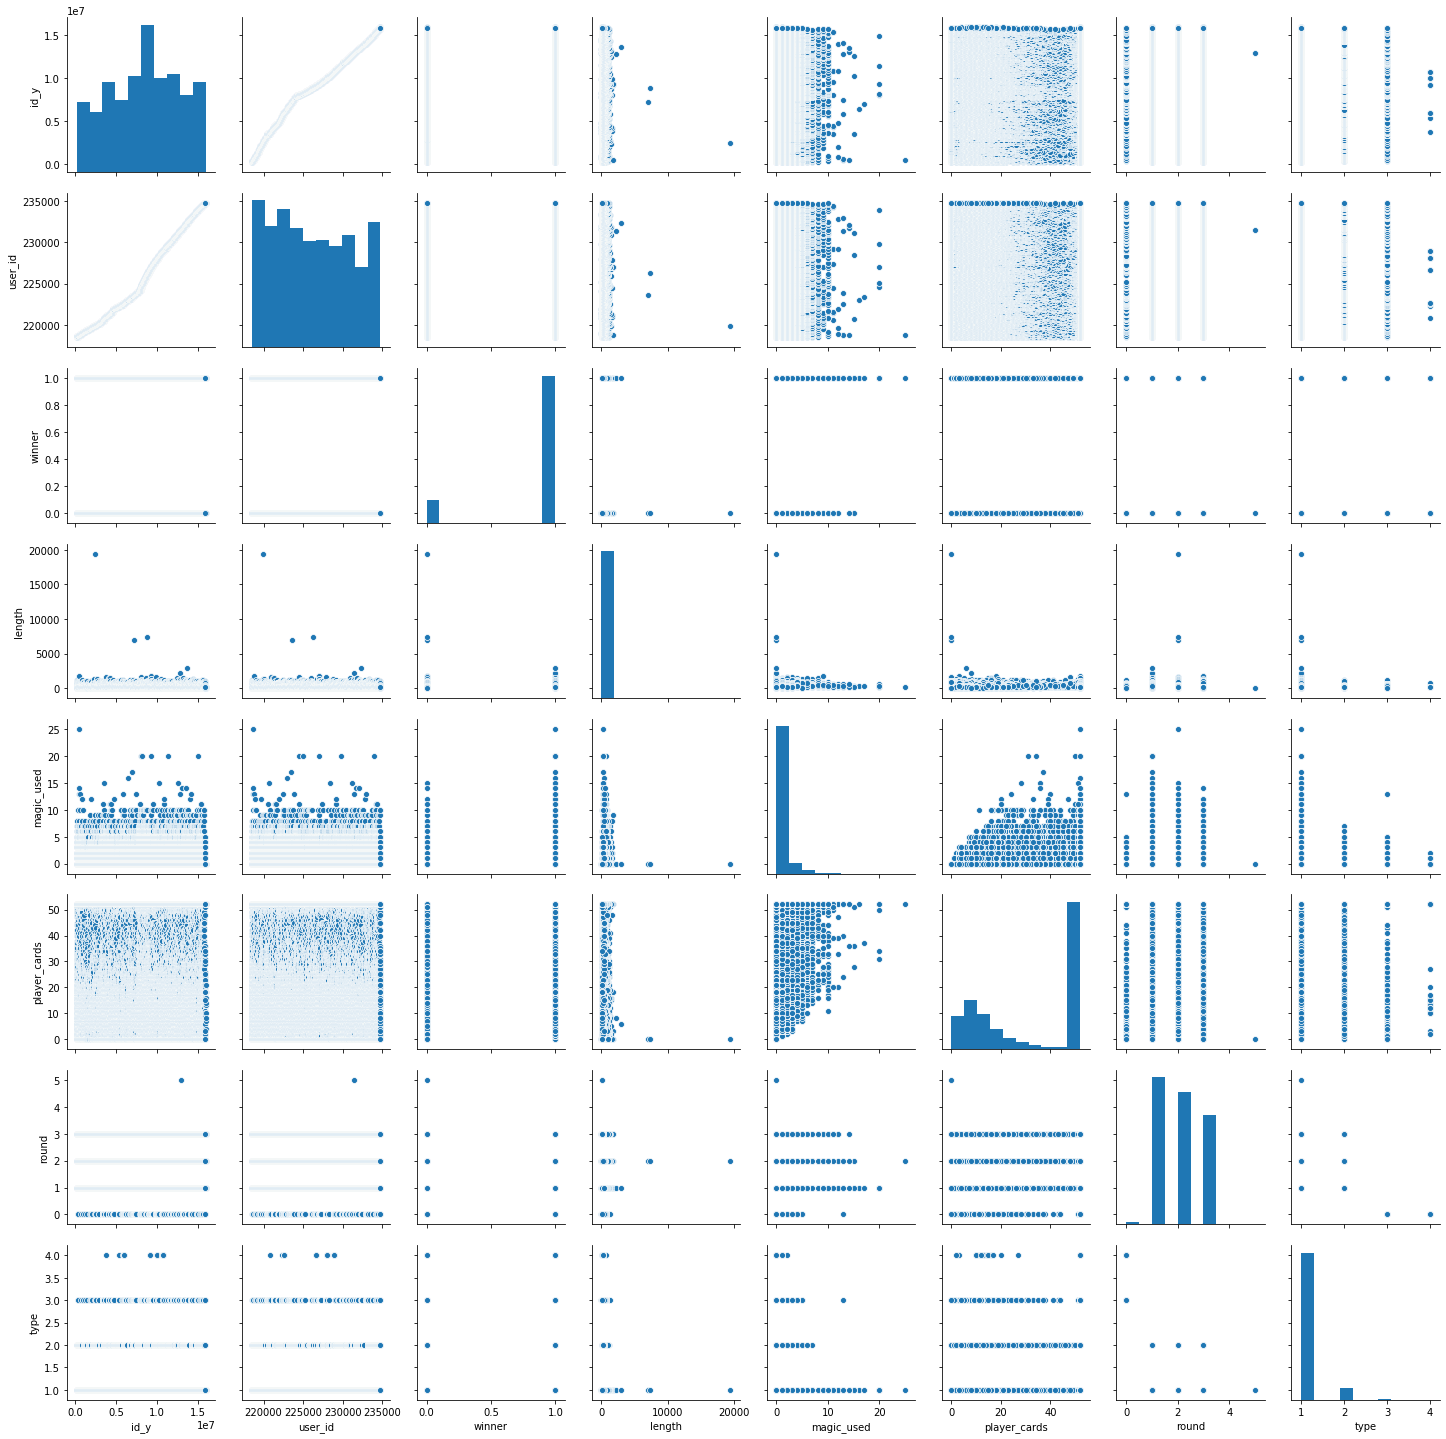

In [11]:
prl = sns.pairplot(df)

### набор данных, содержащих целевую переменную, преобразовала в датафрейм

In [137]:
predictions = pd.read_csv("predictions.csv")

## объединила набор признаков с целевой переменно => получила обучающий набор данных

In [138]:
dataset = pd.merge(left=df, right=predictions, left_on='user_id', right_on='id')

In [139]:
dataset

,create_time,id_y,user_id,timestamp,winner,length,magic_used,player_cards,round,type,id,prediction
0,2019-11-10 00:57:10,218714,218490,2019-11-10 01:14:52,1,375,7,52,1,1,218490,0
1,2019-11-10 00:57:10,219061,218490,2019-11-10 01:23:06,1,475,3,41,2,1,218490,0
2,2019-11-10 00:57:10,219430,218490,2019-11-10 01:31:24,1,476,0,13,3,1,218490,0
3,2019-11-10 00:57:10,219689,218490,2019-11-10 01:38:43,1,329,2,52,1,1,218490,0
4,2019-11-10 00:57:10,219943,218490,2019-11-10 01:45:48,1,389,2,20,2,1,218490,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52705,2020-04-09 23:06:27,15799730,234753,2020-04-09 23:29:02,1,317,0,3,2,1,234753,1
52706,2020-04-09 23:06:27,15799786,234753,2020-04-09 23:29:59,0,57,0,0,3,1,234753,1
52707,2020-04-09 23:10:04,15802401,234754,2020-04-10 00:05:07,1,323,1,52,1,1,234754,0
52708,2020-04-09 23:10:04,15802664,234754,2020-04-10 00:09:04,1,199,0,52,2,1,234754,0


## объединила набор признаков с целевой переменной, выбрала только те, которые не имеют значения целевой переменной, удалила лишнее => получила набор данных, который нужно будет предсказать

In [140]:
task = pd.merge(left=df, right=predictions, left_on='user_id', right_on='id', how='left', indicator=True)
task = task.loc[task["_merge"] != 'both']
task

,create_time,id_y,user_id,timestamp,winner,length,magic_used,player_cards,round,type,id,prediction,_merge
38,2019-11-10 01:32:13,219859,218492,2019-11-10 01:42:48,1,297,2,52,1,1,NaN,NaN,left_only
39,2019-11-10 01:32:13,220071,218492,2019-11-10 01:49:17,1,368,0,4,2,1,NaN,NaN,left_only
40,2019-11-10 01:32:13,220283,218492,2019-11-10 01:54:27,1,284,0,52,3,1,NaN,NaN,left_only
125,2019-11-10 11:15:00,245848,218535,2019-11-10 11:23:17,1,278,1,52,1,1,NaN,NaN,left_only
126,2019-11-10 11:15:00,246207,218535,2019-11-10 11:27:19,1,218,0,52,2,1,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63278,2020-04-09 20:34:06,15790626,234734,2020-04-09 21:59:18,1,186,2,52,2,1,NaN,NaN,left_only
63279,2020-04-09 20:34:06,15791153,234734,2020-04-09 22:03:42,1,236,0,8,3,1,NaN,NaN,left_only
63291,2020-04-09 21:58:48,15791361,234747,2020-04-09 22:05:23,1,178,2,16,1,1,NaN,NaN,left_only
63292,2020-04-09 21:58:48,15791789,234747,2020-04-09 22:08:52,1,175,0,52,2,1,NaN,NaN,left_only


In [141]:
task.sort_values(by = ['user_id']).reset_index(drop = True)
task = task.drop(['id', 'prediction', '_merge'], axis = 1)

In [142]:
task.head()

,create_time,id_y,user_id,timestamp,winner,length,magic_used,player_cards,round,type
38,2019-11-10 01:32:13,219859,218492,2019-11-10 01:42:48,1,297,2,52,1,1
39,2019-11-10 01:32:13,220071,218492,2019-11-10 01:49:17,1,368,0,4,2,1
40,2019-11-10 01:32:13,220283,218492,2019-11-10 01:54:27,1,284,0,52,3,1
125,2019-11-10 11:15:00,245848,218535,2019-11-10 11:23:17,1,278,1,52,1,1
126,2019-11-10 11:15:00,246207,218535,2019-11-10 11:27:19,1,218,0,52,2,1


In [143]:
task = task.reset_index()


In [144]:
task = task.drop(['index'], axis = 1)
task

,create_time,id_y,user_id,timestamp,winner,length,magic_used,player_cards,round,type
0,2019-11-10 01:32:13,219859,218492,2019-11-10 01:42:48,1,297,2,52,1,1
1,2019-11-10 01:32:13,220071,218492,2019-11-10 01:49:17,1,368,0,4,2,1
2,2019-11-10 01:32:13,220283,218492,2019-11-10 01:54:27,1,284,0,52,3,1
3,2019-11-10 11:15:00,245848,218535,2019-11-10 11:23:17,1,278,1,52,1,1
4,2019-11-10 11:15:00,246207,218535,2019-11-10 11:27:19,1,218,0,52,2,1
...,...,...,...,...,...,...,...,...,...,...
10655,2020-04-09 20:34:06,15790626,234734,2020-04-09 21:59:18,1,186,2,52,2,1
10656,2020-04-09 20:34:06,15791153,234734,2020-04-09 22:03:42,1,236,0,8,3,1
10657,2020-04-09 21:58:48,15791361,234747,2020-04-09 22:05:23,1,178,2,16,1,1
10658,2020-04-09 21:58:48,15791789,234747,2020-04-09 22:08:52,1,175,0,52,2,1


### убрала признаки дат, так как они могут мешать пр построении моделей и чтобы оставить их информативность, создала новый признак - отношение даты регистрации к началу игры

In [145]:
dataset['timestamp'] = dataset['timestamp'].values.astype(float)
dataset['create_time'] = dataset['create_time'].values.astype(float)

dataset["datetime"] = dataset["timestamp"] - dataset["create_time"]

In [146]:
dataset = dataset.drop(["timestamp", "create_time", "id"], axis = 1)

In [147]:
task['timestamp'] = task['timestamp'].values.astype(float)
task['create_time'] = task['create_time'].values.astype(float)

task["datetime"] = task["timestamp"] - task["create_time"]

In [148]:
task = task.drop(["timestamp", "create_time"], axis = 1)

### соотношение классов целевой переменной = так как класс "0" значительно превосходит "1", то точность Accuracy не подойдет для оценки модели, лучше использовать ROC AUC.

In [149]:
dataset.groupby(["prediction"]).aggregate({"prediction" : "count"}) #соотношение классов

,prediction
prediction,
0,46638
1,6072


### корреляция признаков с целевой переменной = признаки 'winner', 'round' имеют слишком маленький коэффициент корреляции = удалила их, чтобы модель уделила больше внимания и ресурсов первостепенным признакам

In [150]:
correlations_data = dataset.corr()['prediction'].sort_values()
correlations_data

datetime       -0.249299
type           -0.070599
winner         -0.004740
round          -0.002500
length          0.042690
id_y            0.046720
player_cards    0.047452
user_id         0.049940
magic_used      0.125693
prediction      1.000000
Name: prediction, dtype: float64

In [151]:
dataset = dataset.drop(["round", "winner"], axis = 1)
task = task.drop(["round", "winner"], axis = 1)

# TASK 2

### разбила набор на обучающий и тестовый 

In [152]:
train_X = dataset.drop(["prediction"], axis = 1)
train_y = dataset["prediction"]

#разбили на обуч. и тест. выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_y, test_size=0.25)

### обучение модели LGBMClassifier

In [153]:
model = LGBMClassifier()
model.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [154]:
grid_parameters_LGBM = { 
        'n_estimators': [10, 20, 30],
        'learning_rate': [0.8, 1, 1.2],
        'reg_lambda': [1.1, 1.2, 1.3]}
grid_LGBM = model_selection.GridSearchCV(
        estimator=model,
        param_grid=grid_parameters_LGBM,
        cv = 3,
        n_jobs=-1, 
        verbose=2
    )
fitted_model = grid_LGBM.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  74 out of  81 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.6s finished


In [155]:
# получение лучшего набора
print (grid_LGBM.best_params_)

{'learning_rate': 0.8, 'n_estimators': 30, 'reg_lambda': 1.3}


In [156]:
model = LGBMClassifier(learning_rate = 0.8, n_estimators = 10,  reg_lambda = 1.2)

In [157]:
n_scores = cross_val_score(model, train_X, train_y, scoring='roc_auc', cv=3, n_jobs=-1, error_score='raise')
print('roc_auc: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

roc_auc: 0.734 (0.034)


In [158]:
model.fit(train_X, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.8, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=1.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [159]:
predictions = model.predict(X_test)

In [160]:
res = model.predict(task)
res = pd.DataFrame(res)

### Результаты предсказания

In [161]:
res

,0
0,0
1,1
2,0
3,0
4,0
...,...
10655,0
10656,0
10657,1
10658,1


In [162]:
task

,id_y,user_id,length,magic_used,player_cards,type,datetime
0,219859,218492,297,2,52,1,6.350000e+11
1,220071,218492,368,0,4,1,1.024000e+12
2,220283,218492,284,0,52,1,1.334000e+12
3,245848,218535,278,1,52,1,4.970000e+11
4,246207,218535,218,0,52,1,7.390000e+11
...,...,...,...,...,...,...,...
10655,15790626,234734,186,2,52,1,5.112000e+12
10656,15791153,234734,236,0,8,1,5.376000e+12
10657,15791361,234747,178,2,16,1,3.950000e+11
10658,15791789,234747,175,0,52,1,6.040000e+11


In [163]:
#Переименовала столбцы
res.columns = ['prediction']

In [164]:
task['predictoin'] = res['prediction']

In [165]:
task

,id_y,user_id,length,magic_used,player_cards,type,datetime,predictoin
0,219859,218492,297,2,52,1,6.350000e+11,0
1,220071,218492,368,0,4,1,1.024000e+12,1
2,220283,218492,284,0,52,1,1.334000e+12,0
3,245848,218535,278,1,52,1,4.970000e+11,0
4,246207,218535,218,0,52,1,7.390000e+11,0
...,...,...,...,...,...,...,...,...
10655,15790626,234734,186,2,52,1,5.112000e+12,0
10656,15791153,234734,236,0,8,1,5.376000e+12,0
10657,15791361,234747,178,2,16,1,3.950000e+11,1
10658,15791789,234747,175,0,52,1,6.040000e+11,1


In [167]:
task = task.drop(['id_y', 'length', 'magic_used', 'player_cards', 'type', 'datetime'], axis = 1)

In [168]:
task

,user_id,predictoin
0,218492,0
1,218492,1
2,218492,0
3,218535,0
4,218535,0
...,...,...
10655,234734,0
10656,234734,0
10657,234747,1
10658,234747,1


In [170]:
task.to_csv('my_result.csv', index = None)